Exploratory Data Analysis  

The goal here is to understand my data, spot any patterns or outliers, and prepare for the correlation/relationship analysis.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load the cleaned dataset
df = pd.read_csv('mexico_real_estate_clean.csv')

In [6]:
df.info()
df.describe()
df['state'].value_counts()
df['property_type'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


property_type
house        1329
apartment     407
Name: count, dtype: int64

In [8]:
#creating a box plot to view where our houses are located

fig = px.scatter_mapbox(
    df, # our dataframe
    lat = 'lat',
    lon = 'lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house 

)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

C:\Users\conci\AppData\Local\Temp\ipykernel_2412\2184141410.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


The graph shows that properties are distributed across Mexico, with a high concentration clustered around the central region near Mexico City.

In [10]:
#top ten states with propertys
df['state'].value_counts(ascending = False).head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
Chiapas                             55
Name: count, dtype: int64

Based on the data, most of the property listings are concentrated in Distrito Federal (Mexico City), with 303 entries. This is followed by Estado de México, Yucatán, and Morelos. Overall, the top ten states include a mix of central, coastal, and northern regions, showing that the real estate market is active across different parts of the country.

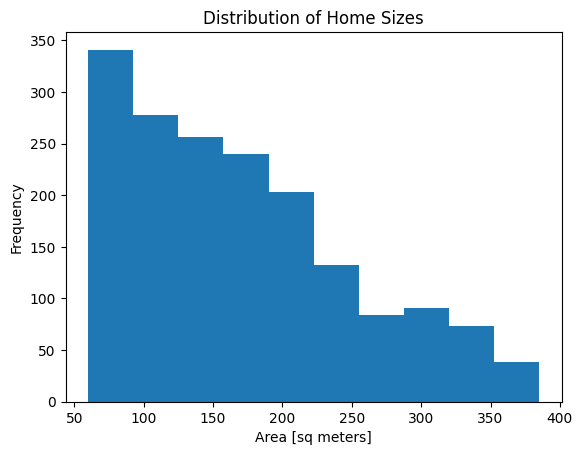

In [11]:
plt.hist(df['area_m2'])
plt.xlabel ("Area [sq meters]")
plt.ylabel ("Frequency")
plt.title ("Distribution of Home Sizes");

The histogram shows that most properties fall between 50 and 150 square meters, which causes the distribution to be skewed. Since smaller homes usually cost less, the average price gets pulled down, creating that left-leaning shape in the graph.

In [14]:
#checking the state with the most expensive real estate market
mean_price_per_state = df.groupby("state")["price_usd"].mean().sort_values(ascending = False)
mean_price_per_state 
df.head(10)

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37
5,house,Querétaro,20.716315,-100.452503,320,274034.68
6,house,Morelos,18.812605,-98.954826,281,151509.56
7,house,Chiapas,16.769737,-93.088928,140,79029.72
8,house,Estado de México,19.305407,-99.646948,235,115937.75
9,house,Morelos,18.804197,-98.932816,117,63223.78


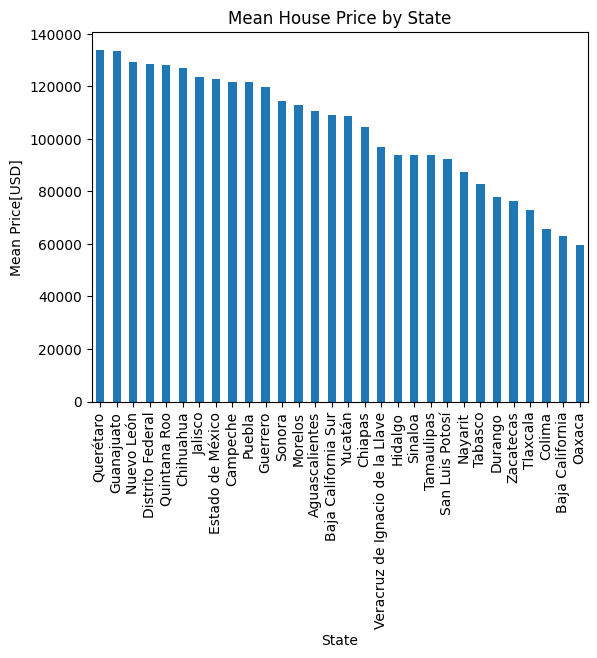

In [15]:
#lets visualize the data
mean_price_per_state.plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Mean Price[USD]",
    title = "Mean House Price by State"
);

Querétaro has the highest average house price, even though its GDP is relatively low compared to other states like Mexico City, which has the highest GDP. This suggests that the higher prices in Querétaro may be due to larger property sizes, while Mexico City might have smaller homes with high prices.

In [17]:
df["price_per_m2"] = df["price_usd"] / df["area_m2"]

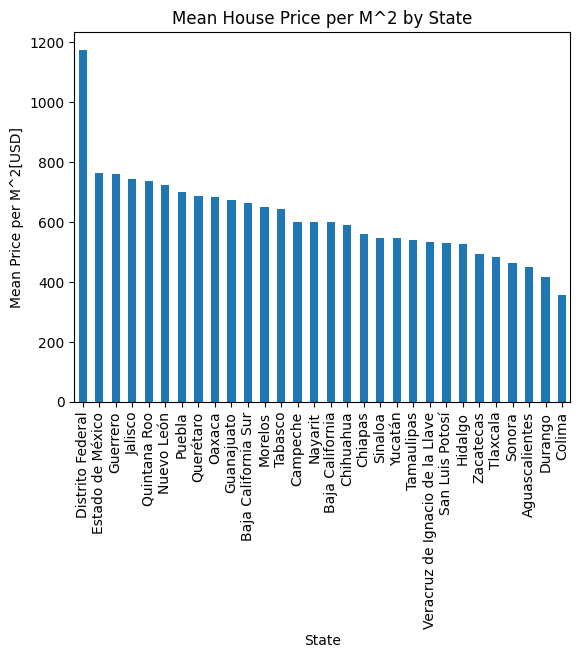

In [18]:
mean_price_per_m2 = df.groupby('state')['price_per_m2'].mean().sort_values(ascending = False)
mean_price_per_m2.plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Mean Price per M^2[USD]",
    title = "Mean House Price per M^2 by State"
);

The bar graph provides a clearer picture, showing that Distrito Federal (Mexico City) is the most expensive state based on the average price per square meter, which aligns with it having the highest GDP. Similarly, Colima, with the second lowest GDP, also has the lowest mean price per square meter, reflecting expected economic patterns. This confirms that analyzing price per square meter offers a more accurate representation of the real estate market across Mexico.

Is there a relationship between home size and price?  

To find out if the size of a home affects its price, I’ll look at how the two are related. This means checking the correlation between home size (in square meters) and price (in USD or per square meter) and creating scatter plots to help visualize the pattern. If there’s a strong positive correlation, it would suggest that bigger homes tend to cost more — giving us a better idea of what’s driving real estate prices in Mexico.

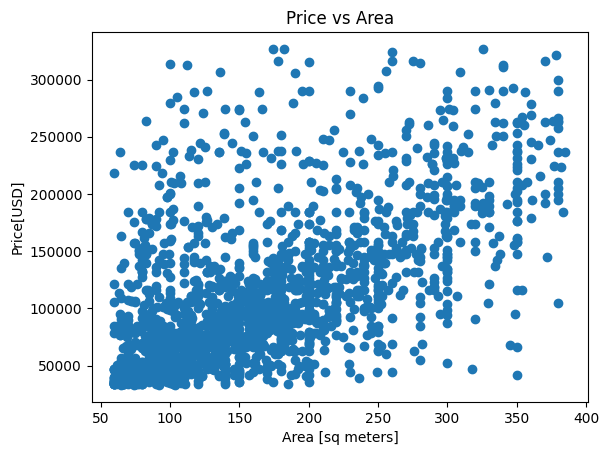

In [19]:
plt.scatter(x= df['area_m2'], y = df['price_usd'])
plt.xlabel ("Area [sq meters]")
plt.ylabel ("Price[USD]")
plt.title ("Price vs Area");

The scatter plot shows a general upward trend, indicating that as property size increases, the price also tends to rise. This suggests a positive relationship between home size and price. To quantify the strength and direction of this relationship, a correlation coefficient will be calculated.

In [20]:
price_area_correlation = df['area_m2'].corr(df['price_usd'])
price_area_correlation

np.float64(0.585518245323206)

The correlation coefficient is approximately 0.59, indicating a moderate to strong positive relationship between property size and price. This means that, in general, larger homes tend to be more expensive. However, the correlation is not perfect, suggesting that other factors besides size also influence property prices.